In [1]:
import json

def get_batch(i, country_of_origin_id="US", title_type='Movie'):
    movie_titles = []
    ratings = []
    runtimes = []
    release_years = []
    with open(f"imdb_movie_metadata/movie_dataset/movie_dataset/movies_batch_{i}.json") as f:
        titles = json.load(f)
        for title in titles:
            if title['titleType'] is None:
                continue
            if not title['titleType']['text'] == title_type:
                continue
            if title['countriesOfOrigin'] is None:
                continue
            if not country_of_origin_id in [country_metadata['id'] for country_metadata in title['countriesOfOrigin']['countries']]:
                continue
            
            # _imdb_id = title['id']
            # _batch_number = i
            _movie_title = title['titleText']['text']
            _rating = title['ratingsSummary']['aggregateRating']
            _runtime = None if title['runtime'] is None else title['runtime']['seconds']
            _release_year = None if title['releaseYear'] is None else title['releaseYear']['year']            

            if _movie_title is None or _rating is None or _runtime is None or _release_year is None:
                continue

            movie_titles.append(_movie_title)
            ratings.append(_rating)
            runtimes.append(_runtime)
            release_years.append(_release_year)
        
        return {
            'movie_titles': movie_titles,
            'ratings': ratings, 
            'runtimes': runtimes, 
            'release_years': release_years,
        }

def get_batches(batch_numbers: list):
    metadata = {
        'movie_titles': [],
        'ratings': [],
        'runtimes': [],
        'release_years': [],
    }
    for batch_number in batch_numbers:
        batch_metadata = get_batch(batch_number)
        metadata['movie_titles'] += batch_metadata['movie_titles']
        metadata['ratings'] += batch_metadata['ratings']
        metadata['runtimes'] += batch_metadata['runtimes']
        metadata['release_years'] += batch_metadata['release_years']
    
    return metadata

In [2]:
import json
movie_data = get_batches([i for i in range(1, 714)])
with open('american_movie_data.json', 'w') as f:
    json.dump(movie_data, f)

In [ ]:
_movie_data = None
with open('american_movie_data.json', 'r') as file:
    _movie_data = json.load(file)
    file.close()

release_years = _movie_data['release_years']
ratings = _movie_data['ratings']
runtimes = _movie_data['runtimes']

In [4]:
def data_by_years(data, start_year=1900, stop_year=1925):
    filtered_data = {k:[] for k in data.keys()}
    release_years = data['release_years']
    valid_years = [i for i in range(start_year, stop_year)]
    for i, release_year in enumerate(release_years):
        if release_year not in valid_years:
            continue
        for k, v in data.items():
            filtered_data[k].append(v[i])
    
    return filtered_data

import random
def data_by_random_sample(data, N):
    num_data_points = len(data['release_years'])
    sample_indices = random.sample([i for i in range(num_data_points)], min(N, num_data_points))
    filtered_data = {k:[] for k in data.keys()}
    for k, v in data.items():
        filtered_data[k] = [v[i] for i in sample_indices]

    return filtered_data

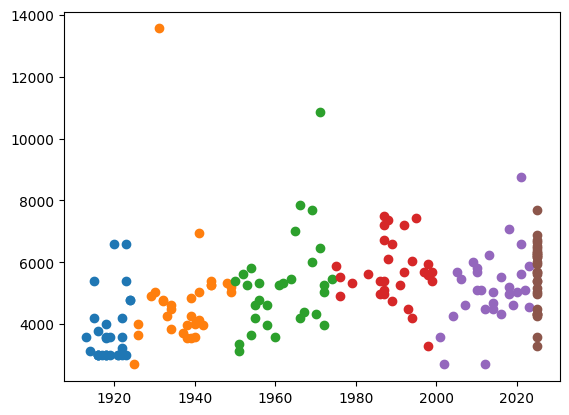

In [16]:
import matplotlib.pyplot as plt

movie_data_1900 = data_by_random_sample(data_by_years(_movie_data, start_year=1900, stop_year=1925), 30)
movie_data_1925 = data_by_random_sample(data_by_years(_movie_data, start_year=1925, stop_year=1950), 30)
movie_data_1950 = data_by_random_sample(data_by_years(_movie_data, start_year=1950, stop_year=1975), 30)
movie_data_1975 = data_by_random_sample(data_by_years(_movie_data, start_year=1975, stop_year=2000), 30)
movie_data_2000 = data_by_random_sample(data_by_years(_movie_data, start_year=2000, stop_year=2025), 30)
movie_data_2025 = data_by_random_sample(data_by_years(_movie_data, start_year=2025, stop_year=2050), 30)

plt.scatter(movie_data_1900['release_years'], movie_data_1900['runtimes'])
plt.scatter(movie_data_1925['release_years'], movie_data_1925['runtimes'])
plt.scatter(movie_data_1950['release_years'], movie_data_1950['runtimes'])
plt.scatter(movie_data_1975['release_years'], movie_data_1975['runtimes'])
plt.scatter(movie_data_2000['release_years'], movie_data_2000['runtimes'])
plt.scatter(movie_data_2025['release_years'], movie_data_2025['runtimes'])

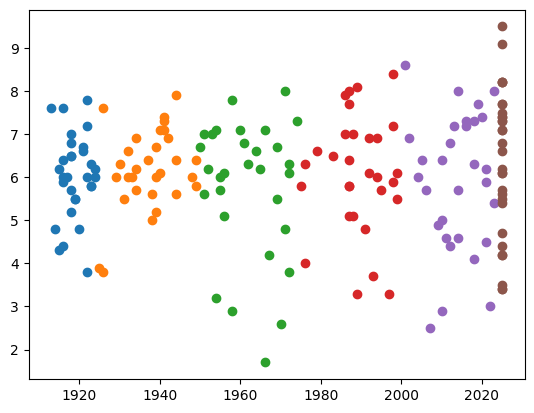

In [17]:
plt.scatter(movie_data_1900['release_years'], movie_data_1900['ratings'])
plt.scatter(movie_data_1925['release_years'], movie_data_1925['ratings'])
plt.scatter(movie_data_1950['release_years'], movie_data_1950['ratings'])
plt.scatter(movie_data_1975['release_years'], movie_data_1975['ratings'])
plt.scatter(movie_data_2000['release_years'], movie_data_2000['ratings'])
plt.scatter(movie_data_2025['release_years'], movie_data_2025['ratings'])

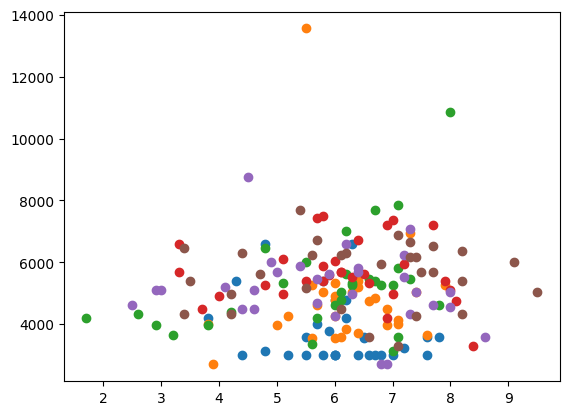

In [18]:
plt.scatter(movie_data_1900['ratings'], movie_data_1900['runtimes'])
plt.scatter(movie_data_1925['ratings'], movie_data_1925['runtimes'])
plt.scatter(movie_data_1950['ratings'], movie_data_1950['runtimes'])
plt.scatter(movie_data_1975['ratings'], movie_data_1975['runtimes'])
plt.scatter(movie_data_2000['ratings'], movie_data_2000['runtimes'])
plt.scatter(movie_data_2025['ratings'], movie_data_2025['runtimes'])

In [19]:
import numpy as np
def get_labeled_features(data, period=50, start_year=1900, end_year=2050, N=30, feature_types=['ratings', 'runtimes']):
    X = []
    y = []
    start_years = [year for year in range(start_year, end_year, period)]
    for _start_year in start_years:
        film_data = data_by_random_sample(data_by_years(_movie_data, start_year=_start_year, stop_year=_start_year+period), N)
        num_data_points = len(film_data['release_years'])
        X += [[film_data[feature_type][i] for feature_type in feature_types] for i in range(num_data_points)]
        y += [_start_year]*N
    
    return X, y

In [20]:
np.array(X)

array([[5.60e+00, 4.20e+03],
       [5.80e+00, 6.18e+03],
       [7.40e+00, 5.04e+03],
       [6.00e+00, 5.10e+03],
       [5.70e+00, 3.66e+03],
       [5.40e+00, 3.24e+03],
       [4.80e+00, 3.18e+03],
       [6.00e+00, 5.34e+03],
       [6.60e+00, 5.58e+03],
       [5.40e+00, 4.14e+03],
       [6.60e+00, 6.24e+03],
       [5.60e+00, 3.06e+03],
       [6.30e+00, 4.80e+03],
       [6.50e+00, 3.78e+03],
       [6.70e+00, 6.12e+03],
       [5.50e+00, 4.44e+03],
       [6.50e+00, 5.64e+03],
       [5.70e+00, 3.60e+03],
       [6.10e+00, 3.66e+03],
       [6.90e+00, 5.40e+03],
       [7.20e+00, 4.92e+03],
       [7.30e+00, 7.20e+03],
       [5.50e+00, 4.68e+03],
       [6.50e+00, 3.60e+03],
       [6.90e+00, 4.32e+03],
       [5.70e+00, 4.26e+03],
       [6.30e+00, 3.54e+03],
       [5.90e+00, 3.00e+03],
       [6.50e+00, 5.46e+03],
       [6.60e+00, 3.78e+03],
       [5.70e+00, 4.38e+03],
       [6.00e+00, 4.56e+03],
       [6.40e+00, 6.60e+03],
       [6.70e+00, 1.05e+04],
       [8.00e+

<Axes: >

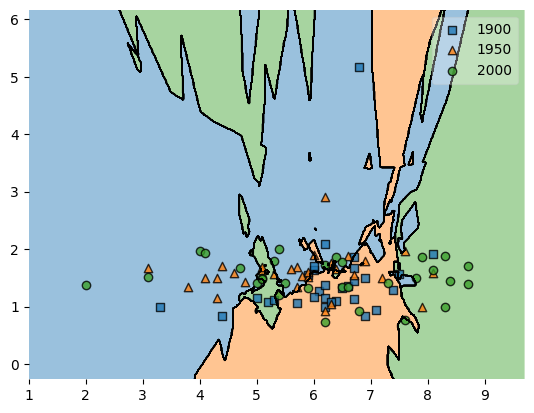

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
import numpy as np
X, y = get_labeled_features(_movie_data)
X = np.array(X)
X_normalized = [[x[0], x[1]/3600] for x in X]

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_normalized, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X_normalized), np.array(y), clf=classifier)

In [10]:
X_normalized

array([[1.69999754e-03, 9.99998555e-01],
       [1.66666435e-03, 9.99998611e-01],
       [1.23015780e-03, 9.99999243e-01],
       [2.23332776e-03, 9.99997506e-01],
       [1.50234572e-03, 9.99998871e-01],
       [1.43192341e-03, 9.99998975e-01],
       [5.89743487e-04, 9.99999826e-01],
       [1.45833178e-03, 9.99998937e-01],
       [1.51741119e-03, 9.99998849e-01],
       [1.74999732e-03, 9.99998469e-01],
       [1.39917559e-03, 9.99999021e-01],
       [1.39705746e-03, 9.99999024e-01],
       [1.29870020e-03, 9.99999157e-01],
       [1.89999657e-03, 9.99998195e-01],
       [1.33744736e-03, 9.99999106e-01],
       [1.56410065e-03, 9.99998777e-01],
       [2.22221674e-03, 9.99997531e-01],
       [1.74999732e-03, 9.99998469e-01],
       [9.16666282e-04, 9.99999580e-01],
       [1.51281878e-03, 9.99998856e-01],
       [1.16666587e-03, 9.99999319e-01],
       [1.44927384e-03, 9.99998950e-01],
       [1.35416543e-03, 9.99999083e-01],
       [1.43518371e-03, 9.99998970e-01],
       [1.322750

array([1950.])

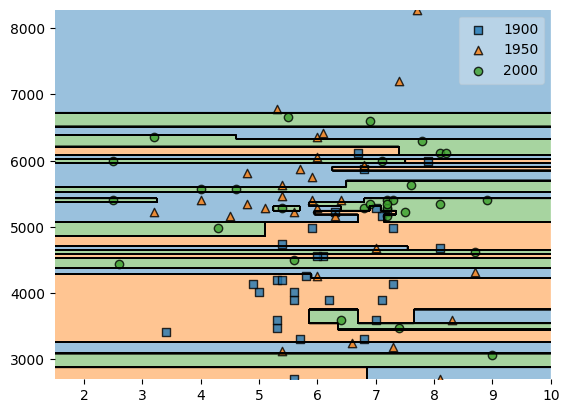

In [11]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
X, y = get_labeled_features(_movie_data)
regressor = KNeighborsRegressor(n_neighbors=1)
regressor.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X), np.array(y), clf=regressor)
regressor.predict([[4, 7000]])

In [12]:
data_by_decade(_movie_data, decade_start=1900)

NameError: name 'data_by_decade' is not defined

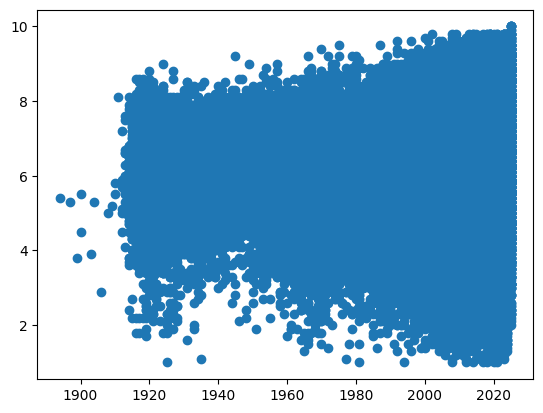

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(release_years, ratings)

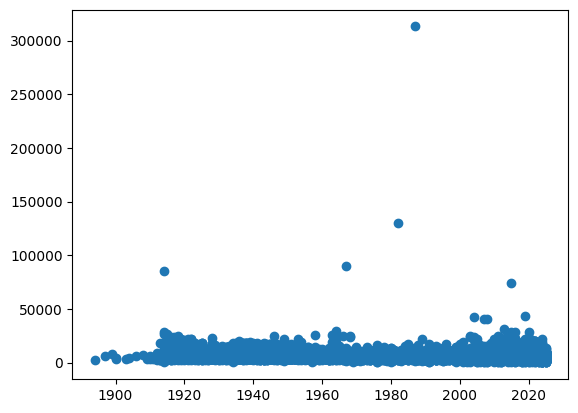

In [ ]:
plt.scatter(release_years, runtimes)

In [ ]:
len(movie_data['movie_titles'])

93735

In [ ]:
import json

with open('imdb_movie_metadata/movies_batch_1.json') as json_data:
    data = json.load(json_data)
    print(data[2]['titleText']['text'])
    print(data[2]['releaseYear']['year'])
    print(data[2]['runtime']['seconds'])
    print(data[2]['ratingsSummary']['aggregateRating'])
    print(d[2]['principalCredits']['credits'])

    json_data.close()

